<a href="https://colab.research.google.com/github/cudeoid/loanPrediction/blob/main/miniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
dataset = pd.read_csv("/content/loan_approval_dataset.csv")
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# **Data Preprocessing**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
#dropping loan_id column as it is not needed for classification
dataset.drop(columns = ['loan_id'], inplace=True)
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
dataset.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
dataset.nunique()

 no_of_dependents              6
 education                     2
 self_employed                 2
 income_annum                 98
 loan_amount                 378
 loan_term                    10
 cibil_score                 601
 residential_assets_value    278
 commercial_assets_value     188
 luxury_assets_value         379
 bank_asset_value            146
 loan_status                   2
dtype: int64

In [ ]:
dataset[' education'].value_counts()

 education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [ ]:
dataset[' loan_status'].value_counts()

 loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [ ]:
dataset[' self_employed'].value_counts()

 self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [ ]:
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
#converting categorical values to numeric values(0, 1) as it will make classification easier
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset[' education'] = label_encoder.fit_transform(dataset[' education'])
dataset[' self_employed'] = label_encoder.fit_transform(dataset[' self_employed'])
dataset[' loan_status'] = label_encoder.fit_transform(dataset[' loan_status'])

dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


# **Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
education_counts = dataset[' education'].value_counts()
education_counts


 education
0    2144
1    2125
Name: count, dtype: int64

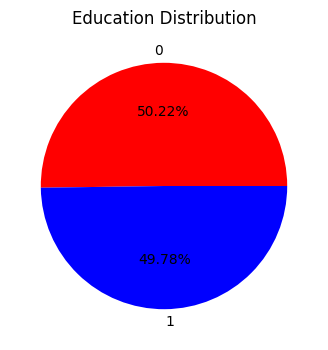

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.2f%%', colors=['red', 'blue'])
plt.title('Education Distribution')
plt.show()

Text(0.5, 1.0, 'Number of Dependents')

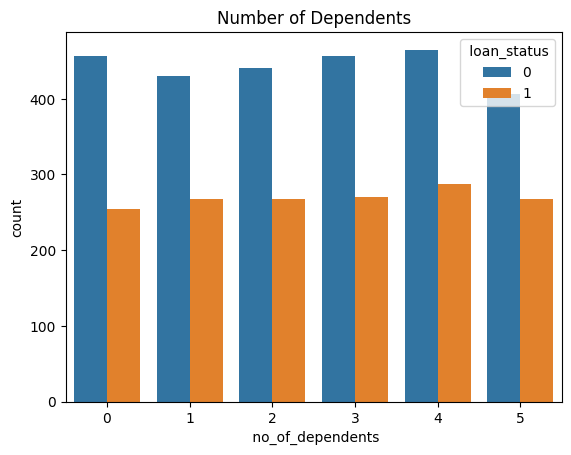

In [ ]:
sns.countplot(x = ' no_of_dependents', data = dataset, hue=" loan_status").set_title('Number of Dependents')

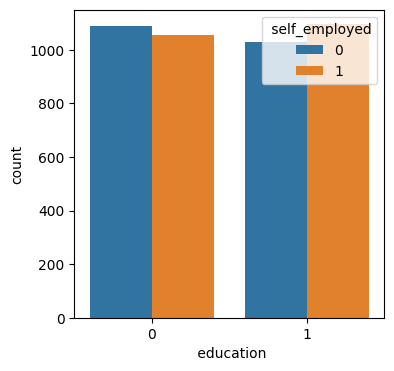

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset, x=" education" , hue=" self_employed")
plt.show()

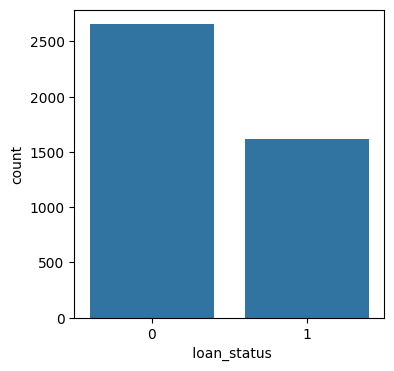

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset, x=" loan_status")
plt.show()

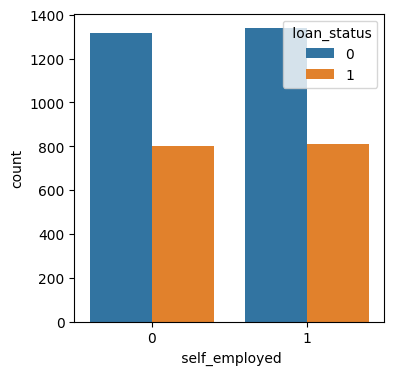

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(data=dataset, x=" self_employed", hue=" loan_status")
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0    no_of_dependents          4269 non-null   int64
 1    education                 4269 non-null   int64
 2    self_employed             4269 non-null   int64
 3    income_annum              4269 non-null   int64
 4    loan_amount               4269 non-null   int64
 5    loan_term                 4269 non-null   int64
 6    cibil_score               4269 non-null   int64
 7    residential_assets_value  4269 non-null   int64
 8    commercial_assets_value   4269 non-null   int64
 9    luxury_assets_value       4269 non-null   int64
 10   bank_asset_value          4269 non-null   int64
 11   loan_status               4269 non-null   int64
dtypes: int64(12)
memory usage: 400.3 KB


# **Split Dataset for Training and Testing**

In [ ]:
x = dataset.drop(columns = [' loan_status'])
y = dataset[' loan_status']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=9)

# **Model Building**

In [ ]:
names = []
scores = []


## **K Nearest Neighbour Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (k) here
names.append("KNN")
# Train the KNN Classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
scores.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.5585480093676815


## **K Nearest Neighbour Classifier For k = 10**

In [ ]:
# Create a KNN Classifier
clf = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors (k) here

# Train the KNN Classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6053864168618267


## **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Create a Naive Bayes Classifier (Gaussian Naive Bayes)
clf = GaussianNB()
names.append("Naive Bayes")
# Train the Naive Bayes Classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
scores.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.775175644028103


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
names.append("decision tree")
# Train the Decision Tree Classifier
clf.fit(x_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
scores.append(accuracy)
print("Accuracy:", accuracy)

Accuracy: 0.9800936768149883


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
names.append("Random Forest")
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
scores.append(accuracy)
print("Accuracy: ", accuracy)

Accuracy:  0.9859484777517564


In [ ]:
features = [
    'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'
]
feature_importances = clf.feature_importances_
feature_importances

array([0.00783519, 0.00196359, 0.00232496, 0.0181197 , 0.02899684,
       0.06225568, 0.81386147, 0.01633386, 0.01626474, 0.01763824,
       0.01440574])

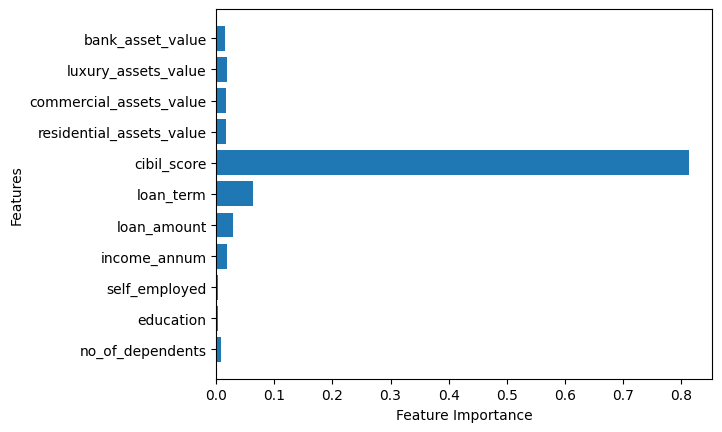

In [ ]:
def plot_graph(model):
    n_features = len(features)
    plt.barh(range(n_features),
             model.feature_importances_,
             align='center')

    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")

plot_graph(clf)
plt.show()

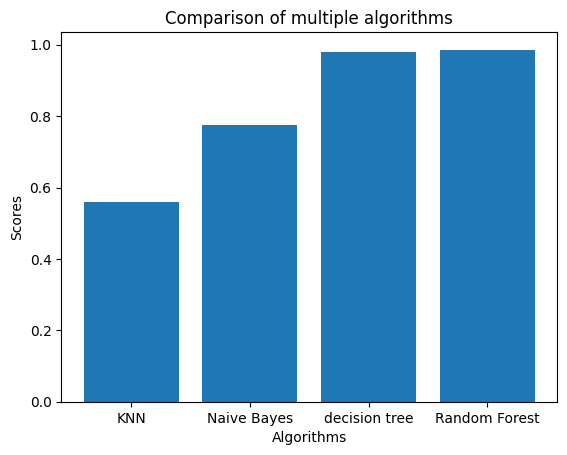

In [ ]:
plt.bar(names, scores)
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()

In [ ]:
#You can use this code for user input
# def predict_loan_approval():
#     # Get input values from the user
#     no_of_dependents = int(input("Enter the number of dependents: "))
#     education = input("Enter education (0 for Graduate and 1 for Not Graduate): ")
#     self_employed = input("Are you self-employed? (1 for Yes and 0 for No): ")
#     income_annum = float(input("Enter the annual income: "))
#     loan_amount = float(input("Enter the loan amount: "))
#     loan_term = int(input("Enter the loan term (in months): "))
#     cibil_score = int(input("Enter the CIBIL score: "))
#     residential_assets_value = float(input("Enter the residential assets value: "))
#     commercial_assets_value = float(input("Enter the commercial assets value: "))
#     luxury_assets_value = float(input("Enter the luxury assets value: "))
#     bank_asset_value = float(input("Enter the bank asset value: "))

#     # Create a DataFrame for the user input
#     user_data = pd.DataFrame(
#         [[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score,
#           residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value]],
#         columns=['no_of_dependents', 'education', 'self_employed',
#        'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
#        'residential_assets_value', 'commercial_assets_value',
#        'luxury_assets_value', 'bank_asset_value',]
#     )


#     # Make prediction
#     prediction = model.predict(user_data)[0]

#     print(f"\nLoan Approval Prediction: {prediction}")

# predict_loan_approval()
# print(Loan Aprroval)